# Fast Fourier Transforms With Python

This Jupyter interactive notebook show you how you can make Fast Fourier Transforms (FFT) using Python and SciPy. 
This is just a quick example tutorial, the real documentation is at: https://docs.scipy.org/doc/scipy-0.18.1/reference/tutorial/fftpack.html for the FFT and http://matplotlib.org/index.html for matplotlib

We first import matplotlib, using the "inline" argument to cause it to display the graphs right inside this notbook.

In [1]:
%matplotlib inline

Next we also import the numpy library, and call it "np", and the matplotlib.pyplot library and call it "plt", and then get the FFT code from scipy.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft, fftfreq, fftshift, ifftshift

Define some useful variables, $N=$the number of points, $T=$total time simulated, and $DT=$the sample spacing in time. We will have 20 seconds in time here, with a 10001 points total on the t axis. We then create a linear space, i.e. a big array with evenly spaced numbers, each 0.002 apart. We show the first 5 elements of the array.

A note on these variable for an FFT. The variable $T$ The total number of points per second, $N/T$, will determine the largest possible frequency that the the simulation can show. The *Nyquist* frequency is defined as $F_N = \frac{N}{2T}$, is the very highest frequency that can be shown, essentially when every other point is a max or a min value. This concepts comes back when we are dealing with Analog to Digital Converters (ADCs). For the FFT, there will be an equal number of points in Frequency space as there will be in Time space, otherwise you would loose or gain information, which is not realistic. Since Frequency space goes from $[-F_N,+F_N]$, you can see that $T$ directly determines how many bins there are per Hz in frequency space. So, if you increase $N$, you will increase how nicely the sinewave is rendered in the Time domain, but you do not increase the resolution (number of bins per Hz) of the Frequency domain. To increase the number of bins in the Frequency domain, we need to increase $T$.

In [3]:
F = 5.
T = 20.     # The length of time determines the resolution of the FFT: how many bins per Hz.
N = 10001   # The total number of points determines the resolution in time: bins per sec. 
            # This translates to the highest available frequency on the FFT
N=  2**20 # In general FFTs go faster if you do them over 2 to the power N points.
DT = T/N
t = np.linspace(0.,T,N)
t[0:5]

array([0.00000000e+00, 1.90735045e-05, 3.81470090e-05, 5.72205136e-05,
       7.62940181e-05])

Now we want to create some kind of signal. In this case, 3 sine waves with frequencies F, 2F and 4F (5,10,20)Hz, and amplitudes of 2, 1 and 0.5 Volts. We create this signal simply using the sin function from numpy.

In [4]:
y = 2.*np.sin(2*np.pi*F*t)+1.*np.sin(2*np.pi*2*F*t)++0.5*np.sin(2*np.pi*4*F*t)

Let's make a plot of this signal, as it would show up on an osciloscope. We limit the time to 1 second, otherwise it gets very hard to see the actual shape of the wave.

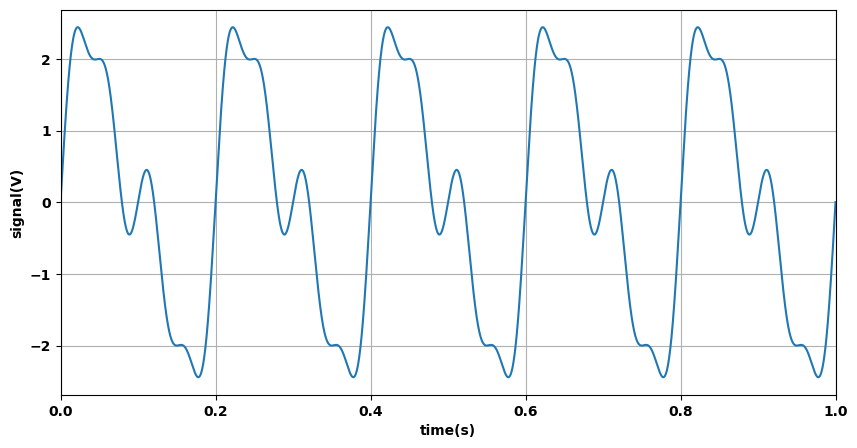

In [5]:
plt.figure(figsize=(10,5))
plt.plot(t,y)
plt.grid(True)
plt.xlabel("time(s)",position=(0.95,1))
plt.ylabel("signal(V)",position=(1,0.9))
ax = plt.gca()
ax.set_xlim(0.,1.)
plt.show()

We now want to see the Fourier Transform of this signal. We need to note a few important details though. First of all, we have a signal that lasts only from 0 to 2 seconds. The full Fourier Transform is defined from $-\infty$ to $+\infty$, so we don't *quite* get three infinitely narrow spikes, which is what we would expect. This issue has to do with the subtle bit of Fast Fourier Transforms called "windowing". Most of the time you can ignore this, if you accept that the window causes artifacts (i.e. the FFT will not perfectly go to zero in between the peaks.)

For the x axis, we use the handy fftfreq() function, which automatically creates the correct x-axis. 

The FFT will have negative and positive frequencies, which in this care are put in the array as [positive values,...,negative values]. This is how the algorithm works, but it doesn't work nice for plotting. The function fftshift() helps out by ordering the array from negative to positive values. In our case, with an input of real values, you only need the positive values of the FFT, so fftshift isn't strictly needed.

We also use ax.set_xlim to set the limit of the x-axis, since otherwise it goes from $-1/2T$ to $+1/2T$. We only need the interval from zero to 30 Hz to see all the signal.

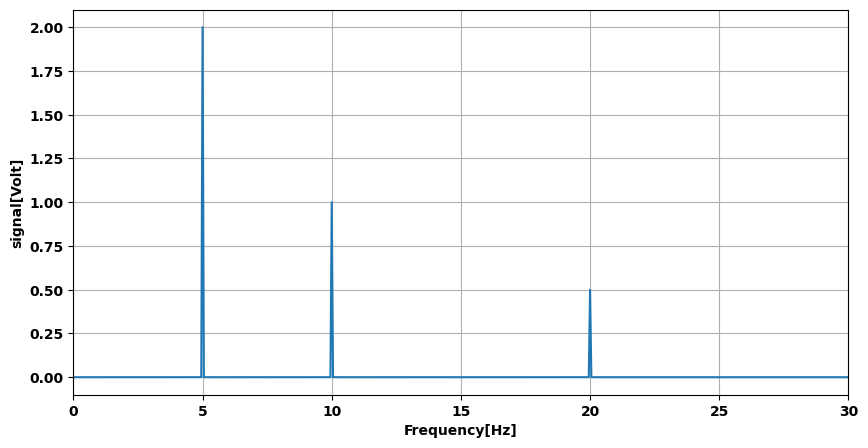

In [6]:
f_fft = fftshift(fftfreq(N,DT))  # Calculate the frequencies, and shift so that f=0Hz is in the center.
y_fft = fftshift(fft(y))         # Calculate the FFT, and also shift so that f=0Hz is in the center.
plt.figure(figsize=(10,5))
plt.plot(f_fft,2./N*np.abs(y_fft)) # Note: the 2./N properly normalizes the FFT amplitude to be in Volts.
plt.grid(True)
ax = plt.gca()
ax.set_xlim(0,30)        # Zoom in: plot only from 0 to 30 Hz.
# plt.yscale("log")      # Uncomment these to get a log-y scale.
# ax.set_ylim(1e-4,1)
plt.xlabel("Frequency[Hz]",position=(0.95,1))
plt.ylabel("signal[Volt]",position=(1,0.8))
plt.show()

In [7]:
# This inspects a sub set of the f_fft array, printing 10 of the values.
f_fft[int(len(f_fft)/2):int(len(f_fft)/2+10)]

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45])

## Square Wave
Now we will look at the FFT of a square wave signal. There is an excellent signal processing library for Python in SciPy called "signal", and it has a ready to go square wave form. See (https://docs.scipy.org/doc/scipy-0.14.0/reference/signal.html). We will use that to create the waveform and then create the FFT. We will use the same frequency, F. The documentation states we need to multiply with $2\pi$. The amplitude will be from -1 to 1.

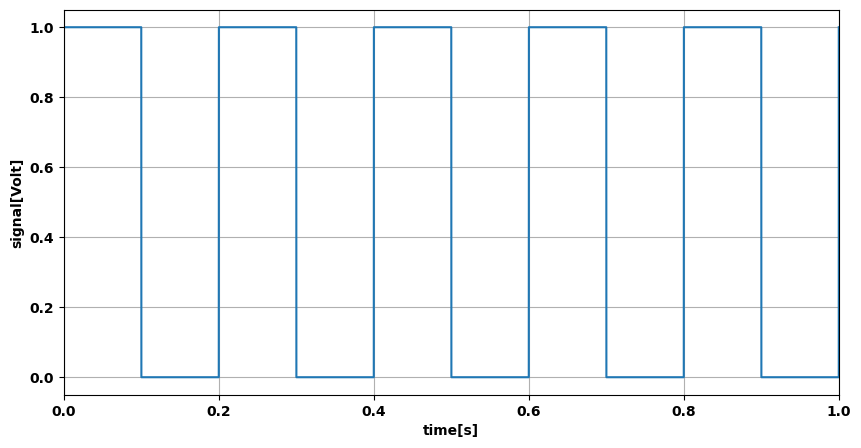

In [8]:
from scipy import signal
y_sq =0.5+0.5*signal.square(2*np.pi*F*t)
plt.figure(figsize=(10,5))
plt.plot(t,y_sq)
plt.grid(True)
plt.xlabel("time[s]",position=(0.95,1))
plt.ylabel("signal[Volt]",position=(1,0.8))
ax = plt.gca()
ax.set_xlim(0,1)
plt.show()

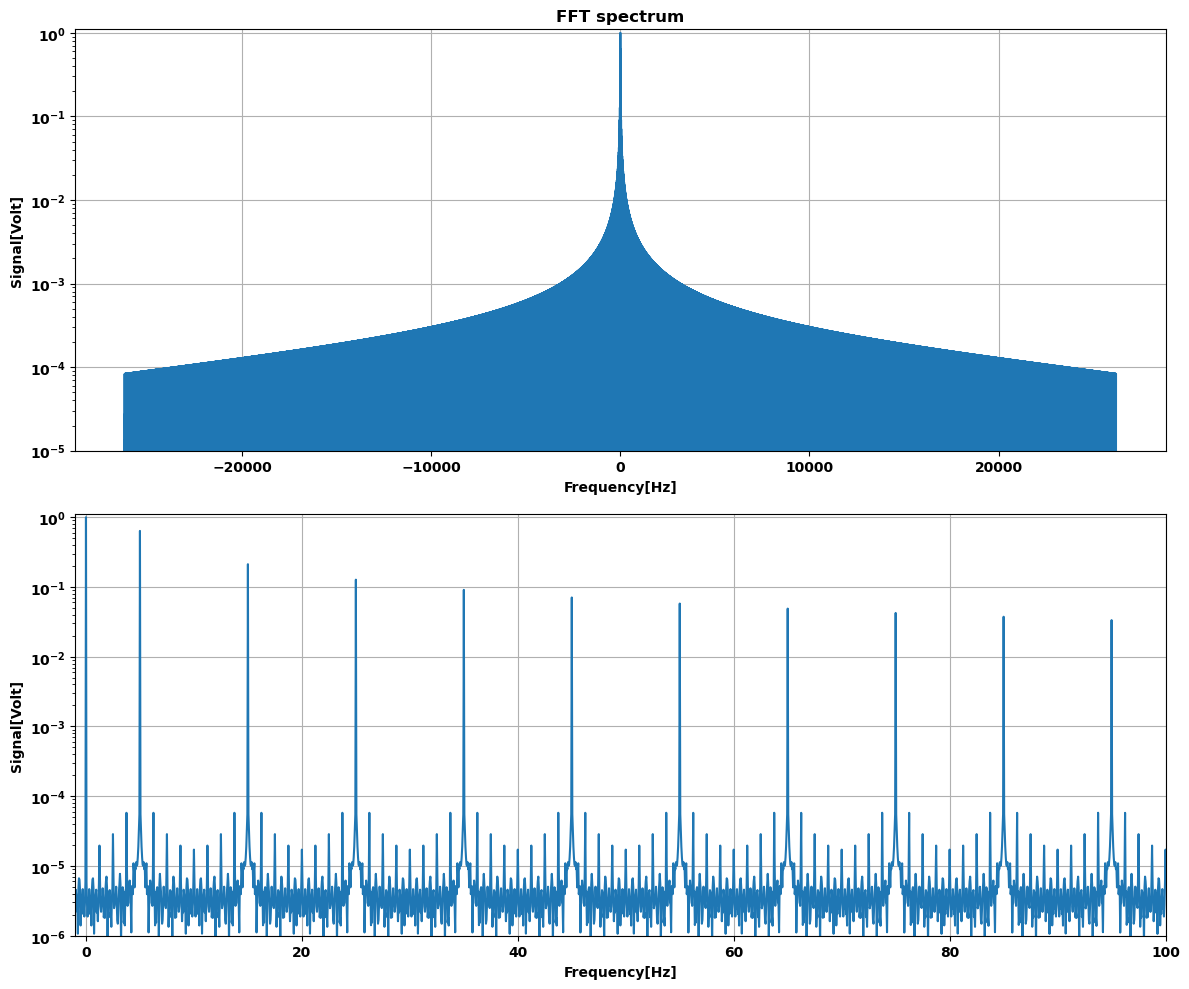

In [9]:
y_sq_fft = fftshift(fft(y_sq)) # Compute the FFT, and shift it so that f=0Hz is at the center (plots better)
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.semilogy(f_fft,2./N*np.abs(y_sq_fft)) # Plot log y and normalize by 2/N so spectrum is in Volt.
plt.grid(True)
ax = plt.gca()
#ax.set_xlim(0,100)
ax.set_ylim(1e-5,1.1)
plt.title("FFT spectrum")
plt.xlabel("Frequency[Hz]",position=(0.9,1))
plt.ylabel("Signal[Volt]",position=(1,0.9))
plt.subplot(2,1,2)                           # Plot again, but zoom in on the first 100 Hz.
plt.semilogy(f_fft,2./N*np.abs(y_sq_fft))
plt.grid(True)
ax = plt.gca()
ax.set_xlim(-1,100)
ax.set_ylim(1e-6,1.1)
plt.xlabel("Frequency[Hz]",position=(0.9,1))
plt.ylabel("Signal[Volt]",position=(1,0.9))
plt.tight_layout()          # Automatically adjust spacing between the 2 plots so they do not overlap
plt.show()

What we see is that the sharp edges of the square wave can only be made with really high frequencies. Also, note all the "noise" at low values $\approx 10^{-3}$, which should all be zero. They are not because of rounding errors in the computation and the

The shape of the FFT is exactly what you expect from Fourier Transforms theory of a square wave: an infinite series of spikes a distance of $2F$ apart, with diminishing amplitudes. The series is truncated in our case because of the limited time for the input signal. The log y-scale emphasizes the artifacts due to the windowing. They would diminish as we let $N\rightarrow\infty$.

We can take the FFT spectrum of our signal and do a reverse FFT to recover the original shape. Depending on the quality of the original FFT, the inverse may show artifacts. Try this by executing this notebook and changing the time span and/or number of points in the FFT and see how the FFT spectrum, and the inverse, change.

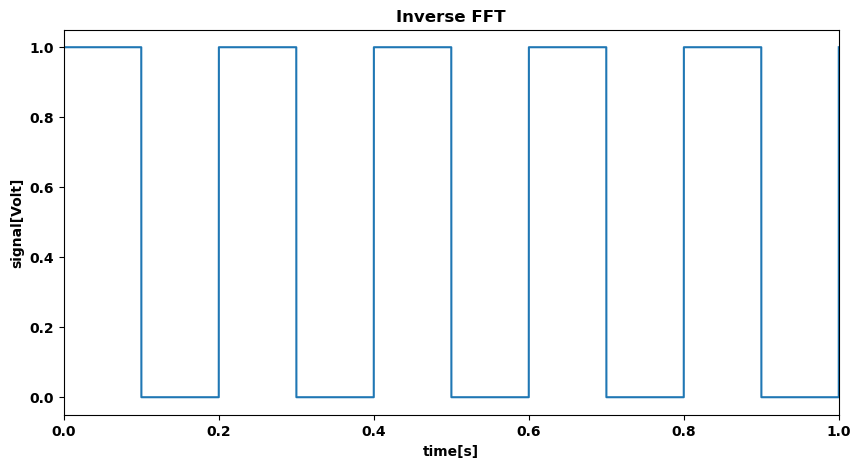

In [10]:
rev_fft = ifft(ifftshift(y_sq_fft))     # Un-shift the fft spectrum first.
plt.figure(figsize=(10,5))
plt.plot(t,np.abs(rev_fft))
plt.title("Inverse FFT")
plt.xlabel("time[s]",position=(0.95,1))
plt.ylabel("signal[Volt]",position=(1,0.8))
ax = plt.gca()
ax.set_xlim(0,1.)
plt.show()